In [1]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# 讀取圖檔
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

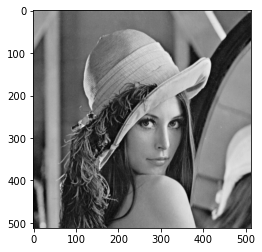

In [3]:
plt.imshow(img.astype('uint8'), cmap ='gray')
plt.show()

In [4]:
def Laplace_Mask1(ori_img, threshold = 15):
    float_img = ori_img.astype(float)
    s = ori_img.shape
    lm_result = np.zeros(s)
    for c in range(s[0]):
        for r in range(s[1]):
            x0 = max(c - 1, 0)
            y0 = max(r - 1, 0)
            x1 = c
            y1 = r
            x2 = min(c + 1, s[0] - 1)
            y2 = min(r + 1, s[1] - 1)
            grad_mag = float_img[x1,y0]+float_img[x0,y1]+float_img[x2,y1]\
                       +float_img[x1,y2]-4*float_img[x1,y1]
            if grad_mag >= threshold:
                lm_result[c,r] = 0
            else:
                lm_result[c,r] = 255
    return lm_result

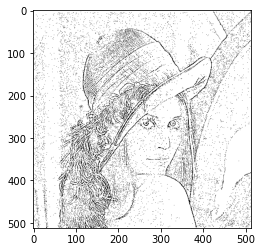

In [5]:
lm1 = Laplace_Mask1(img, 20)
plt.imshow(lm1.astype("uint8"), cmap ='gray')
plt.show()

In [6]:
def Laplace_Mask2(ori_img, threshold = 15):
    float_img = ori_img.astype(float)
    s = ori_img.shape
    lm_result = np.zeros(s)
    for c in range(s[0]):
        for r in range(s[1]):
            x0 = max(c - 1, 0)
            y0 = max(r - 1, 0)
            x1 = c
            y1 = r
            x2 = min(c + 1, s[0] - 1)
            y2 = min(r + 1, s[1] - 1)
            grad_mag = (float_img[x0,y0]+float_img[x1,y0]+float_img[x2,y0]\
                      +float_img[x0,y1]+float_img[x2,y1]+float_img[x0,y2]\
                      +float_img[x0,y2]+float_img[x0,y2]-8*float_img[x1,y1])/3
            if grad_mag >= threshold:
                lm_result[c,r] = 0
            else:
                lm_result[c,r] = 255
    return lm_result

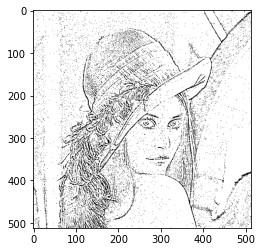

In [7]:
lm2 = Laplace_Mask2(img, 15)
plt.imshow(lm2.astype("uint8"), cmap ='gray')
plt.show()

In [8]:
def Min_Var_Laplace(ori_img, threshold = 20):
    float_img = ori_img.astype(float)
    s = ori_img.shape
    lm_result = np.zeros(s)
    for c in range(s[0]):
        for r in range(s[1]):
            x0 = max(c - 1, 0)
            y0 = max(r - 1, 0)
            x1 = c
            y1 = r
            x2 = min(c + 1, s[0] - 1)
            y2 = min(r + 1, s[1] - 1)
            grad_mag = (2*float_img[x0,y0]-float_img[x1,y0]+2*float_img[x2,y0]\
                      -float_img[x0,y1]-4*float_img[x1,y1]-float_img[x2,y2]\
                      +2*float_img[x0,y2]-float_img[x1,y2]+2*float_img[x2,y2])/3
            if grad_mag >= threshold:
                lm_result[c,r] = 0
            else:
                lm_result[c,r] = 255
    return lm_result

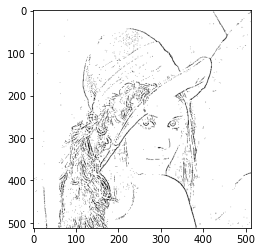

In [9]:
mvl = Min_Var_Laplace(img, 20)
plt.imshow(mvl.astype("uint8"), cmap ='gray')
plt.show()

In [5]:
def Laplacian_of_Gaussian(ori_img, threshold = 3000):
    float_img = ori_img.astype(float)
    s = ori_img.shape
    lm_result = np.zeros(s)
    for c in range(s[0]):
        for r in range(s[1]):
            x0 = max(c - 5, 0)
            y0 = max(r - 5, 0)
            x1 = max(c - 4, 0)
            y1 = max(r - 4, 0)
            x2 = max(c - 3, 0)
            y2 = max(r - 3, 0)
            x3 = max(c - 2, 0)
            y3 = max(r - 2, 0)
            x4 = max(c - 1, 0)
            y4 = max(r - 1, 0)
            x5 = c
            y5 = r
            x6 = min(c + 1, s[0] - 1)
            y6 = min(r + 1, s[1] - 1)
            x7 = min(c + 2, s[0] - 1)
            y7 = min(r + 2, s[1] - 1)
            x8 = min(c + 3, s[0] - 1)
            y8 = min(r + 3, s[1] - 1)
            x9 = min(c + 4, s[0] - 1)
            y9 = min(r + 4, s[1] - 1)
            x10 = min(c + 5, s[0] - 1)
            y10 = min(r + 5, s[1] - 1)
            grad_mag = -float_img[x3,y0]-float_img[x4,y0]-2*float_img[x5,y0]-float_img[x6,y0]-float_img[x7,y0]\
            -2*float_img[x2,y1]-4*float_img[x3,y1]-8*float_img[x4,y1]-9*float_img[x5,y1]\
            -8*float_img[x6,y1]-4*float_img[x7,y1]-2*float_img[x8,y1]\
            -2*float_img[x1,y2]-7*float_img[x2,y2]-15*float_img[x3,y2]-22*float_img[x4,y2]-23*float_img[x5,y2]\
            -22*float_img[x6,y2]-15*float_img[x7,y2]-7*float_img[x8,y2]-2*float_img[x9,y2]\
            -float_img[x0,y3]-4*float_img[x1,y3]-15*float_img[x2,y3]-24*float_img[x3,y3]-14*float_img[x4,y3]-float_img[x5,y3]\
            -14*float_img[x6,y3]-24*float_img[x7,y3]-15*float_img[x8,y3]-4*float_img[x9,y3]-float_img[x10,y3]\
            -float_img[x0,y4]-8*float_img[x1,y4]-22*float_img[x2,y4]-14*float_img[x3,y4]+52*float_img[x4,y4]+103*float_img[x5,y4]\
            +52*float_img[x6,y4]-14*float_img[x7,y4]-22*float_img[x8,y4]-8*float_img[x9,y4]-float_img[x10,y4]\
            -2*float_img[x0,y5]-9*float_img[x1,y5]-23*float_img[x2,y5]-float_img[x3,y5]+103*float_img[x4,y5]+178*float_img[x5,y5]\
            +103*float_img[x6,y5]-float_img[x7,y5]-23*float_img[x8,y5]-9*float_img[x9,y5]-2*float_img[x10,y5]\
            -float_img[x0,y6]-8*float_img[x1,y6]-22*float_img[x2,y6]-14*float_img[x3,y6]+52*float_img[x4,y6]+103*float_img[x5,y6]\
            +52*float_img[x6,y6]-14*float_img[x7,y6]-22*float_img[x8,y6]-8*float_img[x9,y6]-float_img[x10,y6]\
            -float_img[x0,y7]-4*float_img[x1,y7]-15*float_img[x2,y7]-24*float_img[x3,y7]-14*float_img[x4,y7]-float_img[x5,y7]\
            -14*float_img[x6,y7]-24*float_img[x7,y7]-15*float_img[x8,y7]-4*float_img[x9,y7]-float_img[x10,y7]\
            -2*float_img[x1,y8]-7*float_img[x2,y8]-15*float_img[x3,y8]-22*float_img[x4,y8]-23*float_img[x5,y8]\
            -22*float_img[x6,y8]-15*float_img[x7,y8]-7*float_img[x8,y8]-2*float_img[x9,y8]\
            -2*float_img[x2,y9]-4*float_img[x3,y9]-8*float_img[x4,y9]-9*float_img[x5,y9]\
            -8*float_img[x6,y9]-4*float_img[x7,y9]-2*float_img[x8,y9]\
            -float_img[x3,y10]-float_img[x4,y10]-2*float_img[x5,y10]-float_img[x6,y10]-float_img[x7,y10]
            if -grad_mag >= threshold:
                lm_result[c,r] = 0
            else:
                lm_result[c,r] = 255
    return lm_result

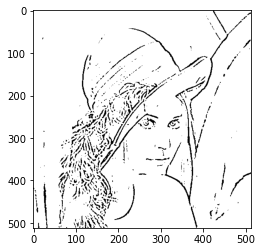

In [11]:
lg = Laplacian_of_Gaussian(img, 11000)
plt.imshow(lg.astype("uint8"), cmap ='gray')
plt.show()

In [38]:
def Difference_of_Gaussian(ori_img, threshold = 1):
    float_img = ori_img.astype(float)
    s = ori_img.shape
    lm_result = np.zeros(s)
    for c in range(s[0]):
        for r in range(s[1]):
            x0 = max(c - 5, 0)
            y0 = max(r - 5, 0)
            x1 = max(c - 4, 0)
            y1 = max(r - 4, 0)
            x2 = max(c - 3, 0)
            y2 = max(r - 3, 0)
            x3 = max(c - 2, 0)
            y3 = max(r - 2, 0)
            x4 = max(c - 1, 0)
            y4 = max(r - 1, 0)
            x5 = c
            y5 = r
            x6 = min(c + 1, s[0] - 1)
            y6 = min(r + 1, s[1] - 1)
            x7 = min(c + 2, s[0] - 1)
            y7 = min(r + 2, s[1] - 1)
            x8 = min(c + 3, s[0] - 1)
            y8 = min(r + 3, s[1] - 1)
            x9 = min(c + 4, s[0] - 1)
            y9 = min(r + 4, s[1] - 1)
            x10 = min(c + 5, s[0] - 1)
            y10 = min(r + 5, s[1] - 1)
            grad_mag = -float_img[x0,y0]-3*float_img[x1,y0]-4*float_img[x2,y0]-6*float_img[x3,y0]-7*float_img[x4,y0]-8*float_img[x5,y0]\
            -7*float_img[x6,y0]-6*float_img[x7,y0]-4*float_img[x8,y0]-4*float_img[x9,y0]-float_img[x10,y0]\
            -3*float_img[x0,y1]-5*float_img[x1,y1]-8*float_img[x2,y1]-11*float_img[x3,y1]-13*float_img[x4,y1]-13*float_img[x5,y1]\
            -13*float_img[x6,y1]-11*float_img[x7,y1]-8*float_img[x8,y1]-5*float_img[x9,y1]-3*float_img[x10,y1]\
            -4*float_img[x0,y2]-8*float_img[x1,y2]-12*float_img[x2,y2]-16*float_img[x3,y2]-17*float_img[x4,y2]-17*float_img[x5,y2]\
            -17*float_img[x6,y2]-16*float_img[x7,y2]-12*float_img[x8,y2]-8*float_img[x9,y2]-4*float_img[x10,y2]\
            -6*float_img[x0,y3]-11*float_img[x1,y3]-16*float_img[x2,y3]-26*float_img[x3,y3]+0*float_img[x4,y3]+15*float_img[x5,y3]\
            +0*float_img[x6,y3]-16*float_img[x7,y3]-16*float_img[x8,y3]-11*float_img[x9,y3]-6*float_img[x10,y3]\
            -7*float_img[x0,y4]-13*float_img[x1,y4]-17*float_img[x2,y4]+0*float_img[x3,y4]+85*float_img[x4,y4]+160*float_img[x5,y4]\
            +85*float_img[x6,y4]+0*float_img[x7,y4]-17*float_img[x8,y4]-13*float_img[x9,y4]-7*float_img[x10,y4]\
            -8*float_img[x0,y5]-13*float_img[x1,y5]-17*float_img[x2,y5]+15*float_img[x3,y5]+160*float_img[x4,y5]+283*float_img[x5,y5]\
            +160*float_img[x6,y5]+15*float_img[x7,y5]-17*float_img[x8,y5]-13*float_img[x9,y5]-8*float_img[x10,y5]\
            -7*float_img[x0,y6]-13*float_img[x1,y6]-17*float_img[x2,y6]+0*float_img[x3,y6]+85*float_img[x4,y6]+160*float_img[x5,y6]\
            +85*float_img[x6,y6]+0*float_img[x7,y6]-17*float_img[x8,y6]-13*float_img[x9,y6]-7*float_img[x10,y6]\
            -6*float_img[x0,y7]-11*float_img[x1,y7]-16*float_img[x2,y7]-26*float_img[x3,y7]+0*float_img[x4,y7]+15*float_img[x5,y7]\
            +0*float_img[x6,y7]-16*float_img[x7,y7]-16*float_img[x8,y7]-11*float_img[x9,y7]-6*float_img[x10,y7]\
            -4*float_img[x0,y8]-8*float_img[x1,y8]-12*float_img[x2,y8]-16*float_img[x3,y8]-17*float_img[x4,y8]-17*float_img[x5,y8]\
            -17*float_img[x6,y8]-16*float_img[x7,y8]-12*float_img[x8,y8]-8*float_img[x9,y8]-4*float_img[x10,y8]\
            -3*float_img[x0,y9]-5*float_img[x1,y9]-8*float_img[x2,y9]-11*float_img[x3,y9]-13*float_img[x4,y9]-13*float_img[x5,y9]\
            -13*float_img[x6,y9]-11*float_img[x7,y9]-8*float_img[x8,y9]-5*float_img[x9,y9]-3*float_img[x10,y9]\
            -float_img[x0,y10]-3*float_img[x1,y10]-4*float_img[x2,y10]-6*float_img[x3,y10]-7*float_img[x4,y10]-8*float_img[x5,y10]\
            -7*float_img[x6,y10]-6*float_img[x7,y10]-4*float_img[x8,y10]-4*float_img[x9,y10]-float_img[x10,y10]
            if -grad_mag >= threshold:
                lm_result[c,r] = 0
            else:
                lm_result[c,r] = 255
    return lm_result

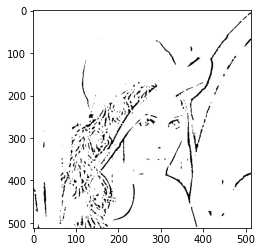

In [39]:
dg = Difference_of_Gaussian(img, 1)
plt.imshow(dg.astype("uint8"), cmap ='gray')
plt.show()

In [40]:
cv2.imwrite('dog.bmp', dg)

True

In [12]:
cv2.imwrite('lg.bmp', lg)

True